[0.10005998 0.49990004 0.29998001 0.10005998] [ True  True  True  True] [0.10005998 0.49990004 0.29998001 0.10005998]
[0.10350889 0.48266235 0.24138288 0.17244588] [ True  True  True  True] [0.10350889 0.48266235 0.24138288 0.17244588]
[0.10720406 0.46419392 0.17860203 0.25      ] [ True  True  True  True] [0.10720406 0.46419392 0.17860203 0.25      ]
[0.11117281 0.44435806 0.11117281 0.33329631] [ True  True  True  True] [0.11117281 0.44435806 0.11117281 0.33329631]


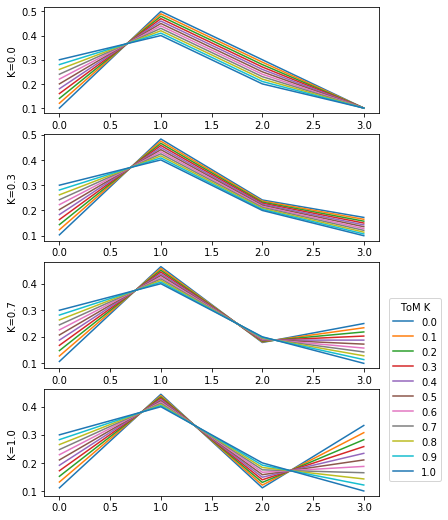

In [5]:
import cooperative_agent as ca
import matplotlib.pyplot as plt
import numpy as np

def K_test(K):
    P = np.array([0.1, 0.5, 0.3, 0.1])
    Q = np.array([0.1, 0.4, 0.1, 0.3])
    tom_Q = np.array([0.3, 0.4, 0.2, 0.1])
    tom_Ks = np.linspace(0, 1, 11)
    P_s = []
    
    # K = 1-K
    for tom_K in tom_Ks:
        # belief update of tom_Q depends on uncertainty regarding P
        # K = 1-K
        if tom_K == 0:
            P_ = ca.functions.inhibition_belief_update(P, Q, K)
            P2_ = ca.functions.inhibition_belief_update(P, Q, K, tom_Q, tom_K)
            print(P_, P_ == P2_, P2_)
        else:
            P_ = ca.functions.inhibition_belief_update(P, Q, K, tom_Q, tom_K)
        
        # independent belief update of Q and tom_Q
        # a higher K increases the influence of Q
        # P_ = ca.functions.inhibition_belief_update(P, Q, K)
        # a higher tom_K increases the influence of tom_Q
        # P_ = ca.functions.inhibition_belief_update(P_, tom_Q, tom_K)
        
        # print("tom_K {:0.1f} elicits posterior {} with sum {:0.1f}".format(tom_K, P_, np.sum(P_)))
        P_s.append((tom_K, P_))
    return P_s
    
import matplotlib.pyplot as pl
fig, axes = pl.subplots(nrows=4, ncols=1, figsize=(6,9))

Ks = np.linspace(0.0, 1, 4)
for ax_idx, K in enumerate(Ks):
    P_s = K_test(K)
    ax = axes[ax_idx]
    for _p in P_s:
        ax.set_ylabel("K={:0.1f}".format(K))
        ax.plot(_p[1], label="{:0.1f}".format(_p[0]))

pl.legend(title="ToM K", loc='center right', bbox_to_anchor=(1.2, 1))
pl.show()